<a href="https://colab.research.google.com/github/fasih245/AI-and-Machine-Learning/blob/main/RandomForestClassifier_(Diabetes_Prediction_)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [4]:
df= pd.read_csv("/content/diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68])

In [7]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=fd9b4a3fb8507a7b2577c3ed1bfccb4f6811f6fd51ad1bd6438b47bc467778b8
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [8]:
  from ydata_profiling import ProfileReport

In [9]:
# # Load CSV file
# df = pd.read_csv("/content/diabetes.csv")  # Replace with your file name

# # Generate the profile report
# profile = ProfileReport(df, title="CSV Dataset EDA Report", explorative=True)

# # Display the report inside the notebook
# profile.to_notebook_iframe()

# # Optional: Export to an HTML file
# profile.to_file("/content/csv_data_report.html")

In [10]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


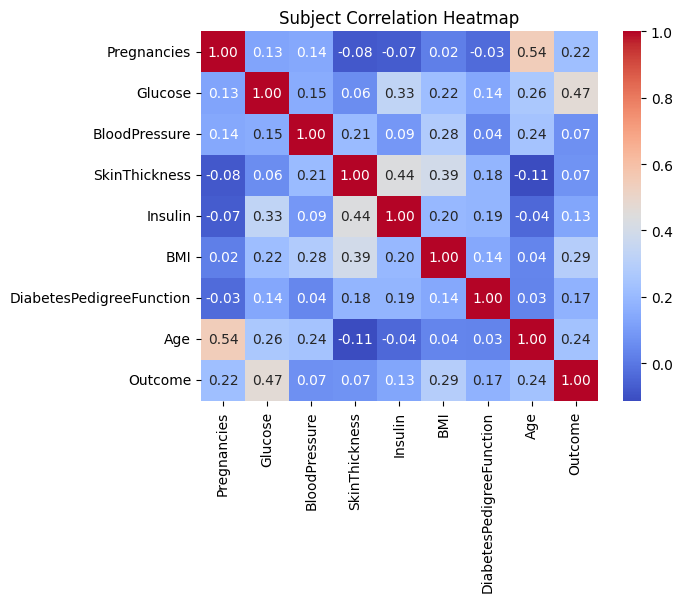

In [11]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Subject Correlation Heatmap')
plt.show()

<h1> 🚀 Attemping Improvements for this Case

1. ✅ Handle Missing or Invalid Values
Columns like Glucose, Insulin, BMI, and SkinThickness often contain 0 values, which are biologically impossible and should be treated as missing.

In [12]:
# Replace 0s with NaN in specified columns
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_fix] = df[cols_to_fix].replace(0, np.nan)
# Fill missing values with median
df.fillna(df.median(), inplace=True)

In [13]:
df.shape

(768, 9)

<h1> Model training Using Random Forest Classifier

In [14]:
# Feature and target selection
X = df[['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
feature_cols = X
y = df['Outcome']


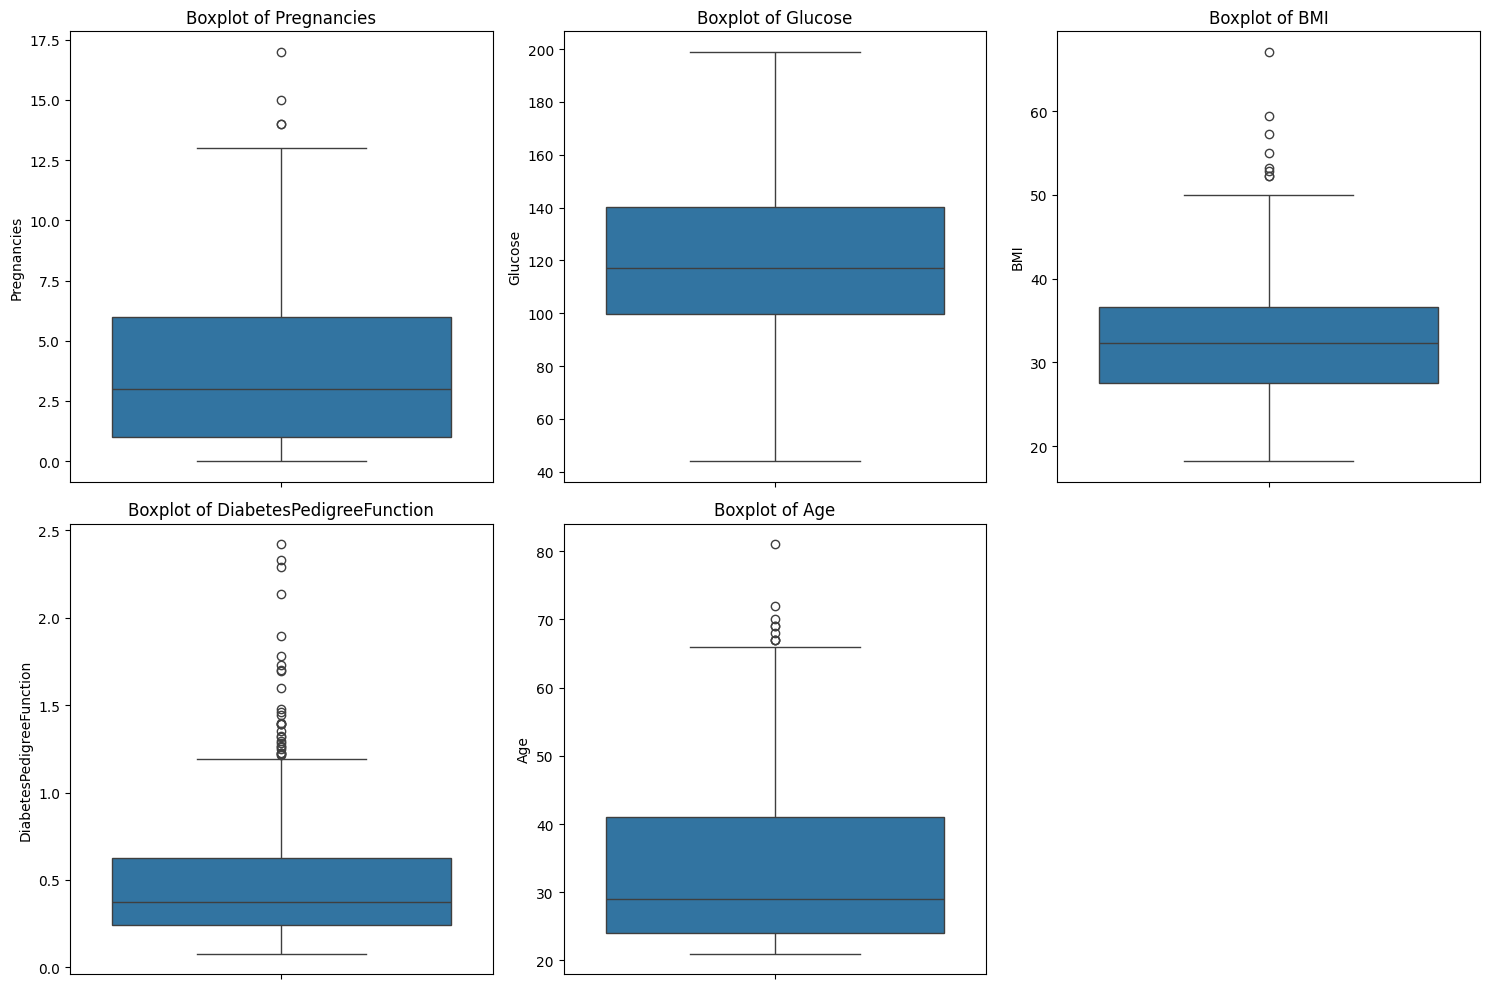

In [15]:
# Checking for Outliers
# Create subplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [16]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
# Using SMOTE to Balance the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)




<h2> Tried Running best Params but Failed as it dropped the accuracy to 81.5 from 83%.

In [18]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2']
# }

# # Create GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

In [19]:
# # STEP 1: Split first (you already did this)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # STEP 2: Apply SMOTE on training data only (to prevent data leakage)
# smote = SMOTE(random_state=42)
# X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# # STEP 3: Perform GridSearchCV on balanced training data
# grid_search = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# grid_search.fit(X_train_balanced, y_train_balanced)

# # STEP 4: Evaluate on the untouched test set
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_test)

# print("✅ Accuracy on test set:", best_rf.score(X_test, y_test))


In [20]:
# # Final results
# print("✅ Best Parameters:", grid_search.best_params_)
# print("✅ Test Set Accuracy: {:.2f}%".format(best_rf.score(X_test, y_test) * 100))
# print("\n📊 Classification Report:")
# print(classification_report(y_test, y_pred))


In [21]:
# # Fit on training data
# grid_search.fit(X_train, y_train)

# # Best model from search
# best_rf = grid_search.best_estimator_

# # Predictions using the best model
# y_pred = best_rf.predict(X_test)

In [22]:
# # Make predictions using the best model found
# y_pred = grid_search.best_estimator_.predict(X_test)

# # Print best parameters
# print("✅ Best Parameters:", grid_search.best_params_)

# # Print test accuracy
# print("✅ Test Accuracy on Unseen Data:", grid_search.best_estimator_.score(X_test, y_test))


In [23]:
# from sklearn.metrics import classification_report

# print("📊 Classification Report:")
# print(classification_report(y_test, y_pred))


<h3> X----X----X----X----XX----X----X----X---- X----X----X----X----X X----X----X----X----X

In [24]:
# Example: X = features, y = target (0 or 1 for binary classification)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [25]:
# # Train model
model = RandomForestClassifier(class_weight= 'balanced',n_estimators=300, random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print(f'{score*100}%')

83.0%


In [26]:
  # Predict on both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [27]:
# Evaluate performance
train_metrics = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Confusion Matrix": confusion_matrix(y_train, y_train_pred),
    "Classification Report": classification_report(y_train, y_train_pred, output_dict=True)
}

test_metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Confusion Matrix": confusion_matrix(y_test, y_test_pred),
    "Classification Report": classification_report(y_test, y_test_pred, output_dict=True)
}

In [28]:
train_metrics

{'Accuracy': 1.0,
 'Confusion Matrix': array([[401,   0],
        [  0, 399]]),
 'Classification Report': {'0': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 401.0},
  '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 399.0},
  'accuracy': 1.0,
  'macro avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 800.0},
  'weighted avg': {'precision': 1.0,
   'recall': 1.0,
   'f1-score': 1.0,
   'support': 800.0}}}

In [29]:
test_metrics

{'Accuracy': 0.83,
 'Confusion Matrix': array([[76, 23],
        [11, 90]]),
 'Classification Report': {'0': {'precision': 0.8735632183908046,
   'recall': 0.7676767676767676,
   'f1-score': 0.8172043010752689,
   'support': 99.0},
  '1': {'precision': 0.7964601769911505,
   'recall': 0.8910891089108911,
   'f1-score': 0.8411214953271028,
   'support': 101.0},
  'accuracy': 0.83,
  'macro avg': {'precision': 0.8350116976909776,
   'recall': 0.8293829382938294,
   'f1-score': 0.8291628982011858,
   'support': 200.0},
  'weighted avg': {'precision': 0.8346261824839794,
   'recall': 0.83,
   'f1-score': 0.829282484172445,
   'support': 200.0}}}

<h5> Trained the model without any enhancments and got an accuracy of 75.97%